In [1]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
exp_root = "/media/yesindeed/DATADRIVE1/mount/remote_cse/experiments/med_vlm_benchmark/merged"

df_results = pd.read_csv(os.path.join(exp_root, "results_bootstrap.csv"))

df_results

,model,task,dataset,model_type,trainable_module,path,have_eval_result,have_prediction,have_gpt_score,model_family,...,precision_overall,f1_overall,exact_match_closed,recall_closed,precision_closed,f1_score_closed,accuracy_closed,gpt_score_open,gpt_score_overall,f1_score_overall
0,Qwen2-VL,vqa,SLAKE,general,NaN,vqa/SLAKE/Qwen2-VL/eval_seed0/Qwen2-VL-7B-Inst...,1,1,1,Qwen,...,0.292940,0.318349,0.658576,0.774292,0.661916,0.668470,0.779088,0.673410,0.714850,0.318534
1,Qwen25-VL,vqa,SLAKE,general,NaN,vqa/SLAKE/Qwen25-VL/eval_seed0/Qwen2.5-VL-7B-I...,1,1,1,Qwen,...,0.260505,0.274167,0.627633,0.747762,0.629873,0.634036,0.754682,0.649750,0.690877,0.274209
2,Gemma3,vqa,SLAKE,general,NaN,vqa/SLAKE/Gemma3/eval_seed0/gemma-3-4b-it,1,1,1,Gemma,...,0.038331,0.056352,0.071238,0.657399,0.073495,0.097916,0.720723,0.652927,0.679506,0.056502
3,MedGemma,vqa,SLAKE,medical,NaN,vqa/SLAKE/MedGemma/eval_seed0/medgemma-4b-it,1,1,1,Gemma,...,0.250334,0.265892,0.596903,0.726500,0.598881,0.603805,0.769371,0.759668,0.763464,0.265693
4,InternVL3,vqa,SLAKE,general,NaN,vqa/SLAKE/InternVL3/eval_seed0/InternVL3-8B-hf,1,1,1,Intern,...,0.102121,0.128382,0.209114,0.711309,0.212296,0.238496,0.744927,0.675340,0.702622,0.128349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,VILA,vqa,VQA-RAD,general,ML,vqa/VQA-RAD/VILA1.5/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.484766,0.472669,0.637849,0.637849,0.637849,0.637849,0.637849,0.448076,0.553582,0.472417
84,VILA-M3,vqa,VQA-RAD,medical,ML,vqa/VQA-RAD/VILA-M3/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.369967,0.379170,0.537973,0.537973,0.537973,0.537973,0.537973,0.467230,0.506522,0.378829
85,Lingshu,vqa,Harvard-FairVLMed10k,medical,ML,vqa/Harvard-FairVLMed10k/Lingshu/eval_seed0/1e...,1,1,1,Qwen,...,0.580966,0.580271,0.739088,0.739088,0.739088,0.739088,0.739088,0.572615,0.655800,0.580334
86,VILA,vqa,Harvard-FairVLMed10k,general,ML,vqa/Harvard-FairVLMed10k/VILA1.5/eval_seed0/1e...,1,1,1,VILA,...,0.667989,0.647041,0.811056,0.811056,0.811056,0.811056,0.811056,0.560974,0.685936,0.647008


In [3]:
df_results["trainable_module"].fillna(value="ZS", inplace=True)

/tmp/ipykernel_615623/109891910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_results["trainable_module"].fillna(value="ZS", inplace=True)


In [4]:
df_results["dataset+tune_module"] = df_results["dataset"] + \
    "-" + df_results["trainable_module"]
df_results

,model,task,dataset,model_type,trainable_module,path,have_eval_result,have_prediction,have_gpt_score,model_family,...,f1_overall,exact_match_closed,recall_closed,precision_closed,f1_score_closed,accuracy_closed,gpt_score_open,gpt_score_overall,f1_score_overall,dataset+tune_module
0,Qwen2-VL,vqa,SLAKE,general,ZS,vqa/SLAKE/Qwen2-VL/eval_seed0/Qwen2-VL-7B-Inst...,1,1,1,Qwen,...,0.318349,0.658576,0.774292,0.661916,0.668470,0.779088,0.673410,0.714850,0.318534,SLAKE-ZS
1,Qwen25-VL,vqa,SLAKE,general,ZS,vqa/SLAKE/Qwen25-VL/eval_seed0/Qwen2.5-VL-7B-I...,1,1,1,Qwen,...,0.274167,0.627633,0.747762,0.629873,0.634036,0.754682,0.649750,0.690877,0.274209,SLAKE-ZS
2,Gemma3,vqa,SLAKE,general,ZS,vqa/SLAKE/Gemma3/eval_seed0/gemma-3-4b-it,1,1,1,Gemma,...,0.056352,0.071238,0.657399,0.073495,0.097916,0.720723,0.652927,0.679506,0.056502,SLAKE-ZS
3,MedGemma,vqa,SLAKE,medical,ZS,vqa/SLAKE/MedGemma/eval_seed0/medgemma-4b-it,1,1,1,Gemma,...,0.265892,0.596903,0.726500,0.598881,0.603805,0.769371,0.759668,0.763464,0.265693,SLAKE-ZS
4,InternVL3,vqa,SLAKE,general,ZS,vqa/SLAKE/InternVL3/eval_seed0/InternVL3-8B-hf,1,1,1,Intern,...,0.128382,0.209114,0.711309,0.212296,0.238496,0.744927,0.675340,0.702622,0.128349,SLAKE-ZS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,VILA,vqa,VQA-RAD,general,ML,vqa/VQA-RAD/VILA1.5/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.472669,0.637849,0.637849,0.637849,0.637849,0.637849,0.448076,0.553582,0.472417,VQA-RAD-ML
84,VILA-M3,vqa,VQA-RAD,medical,ML,vqa/VQA-RAD/VILA-M3/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.379170,0.537973,0.537973,0.537973,0.537973,0.537973,0.467230,0.506522,0.378829,VQA-RAD-ML
85,Lingshu,vqa,Harvard-FairVLMed10k,medical,ML,vqa/Harvard-FairVLMed10k/Lingshu/eval_seed0/1e...,1,1,1,Qwen,...,0.580271,0.739088,0.739088,0.739088,0.739088,0.739088,0.572615,0.655800,0.580334,Harvard-FairVLMed10k-ML
86,VILA,vqa,Harvard-FairVLMed10k,general,ML,vqa/Harvard-FairVLMed10k/VILA1.5/eval_seed0/1e...,1,1,1,VILA,...,0.647041,0.811056,0.811056,0.811056,0.811056,0.811056,0.560974,0.685936,0.647008,Harvard-FairVLMed10k-ML


In [5]:
model_order = [
    "LLaVA-1.5",
    "LLaVA-Med",
    "Qwen2-VL",
    "Qwen25-VL",
    "Lingshu",
    "Gemma3",
    "MedGemma",
    # "VILA",
    # "VILA-M3",
    "InternVL3",
    "o3",
    "gemini-2.5-pro",
]

data_order = [
    "VQA-RAD-ZS",
    "VQA-RAD-ML",
    "PathVQA-ZS",
    "PathVQA-ML",
    "SLAKE-ZS",
    "SLAKE-ML",
    "Harvard-FairVLMed10k-ZS",
    "Harvard-FairVLMed10k-ML",
]

metric = "gpt_score_overall"
df_plot = df_results.copy(deep=True)
df_plot = df_plot.loc[~df_plot["model"].isin(["VILA", "VILA-M3"])]

df_plot[metric] = df_plot[metric] * 100

data_heatmap = df_plot.pivot(index="model", columns="dataset+tune_module", values=metric)
data_heatmap = data_heatmap.reindex(model_order, axis=0)
data_heatmap = data_heatmap.reindex(data_order, axis=1)
data_heatmap

dataset+tune_module,VQA-RAD-ZS,VQA-RAD-ML,PathVQA-ZS,PathVQA-ML,SLAKE-ZS,SLAKE-ML,Harvard-FairVLMed10k-ZS,Harvard-FairVLMed10k-ML
model,,,,,,,,
LLaVA-1.5,50.146581,60.528370,40.134614,69.618607,59.317156,84.085321,44.929169,71.566823
LLaVA-Med,60.812619,64.520488,49.146896,63.802304,57.291783,81.040123,62.000120,68.969534
Qwen2-VL,68.545865,67.832940,54.968767,71.901142,71.484980,85.671261,54.589647,72.042856
Qwen25-VL,66.852262,71.186774,51.570934,71.303926,69.087720,86.297467,54.909564,72.607877
Lingshu,67.262368,60.852428,63.115763,38.351770,74.173958,73.069127,63.111569,65.580024
Gemma3,56.701721,55.873991,56.917970,65.630280,67.950579,80.052777,57.681964,69.455529
MedGemma,68.653067,68.996242,59.305949,72.767767,76.346360,88.546933,56.829359,69.165024
InternVL3,67.018004,63.648681,57.289014,59.148864,70.262248,83.464867,60.236123,68.976223
o3,74.596650,NaN,60.669781,NaN,77.485221,NaN,55.476113,NaN


In [6]:
OOD_datasets = ["Harvard-FairVLMed10k"]

RQ_data = []

for model_family, family_group in df_plot.groupby("model_family"):
    for dataset, dataset_group in family_group.groupby("dataset"):
        ft_subdf = dataset_group.loc[dataset_group["trainable_module"] == "ML"]
        ft_med_subdf = ft_subdf.loc[ft_subdf["model_type"] == "medical"]
        ft_gen_subdf = ft_subdf.loc[ft_subdf["model_type"] == "general"]
        if dataset not in OOD_datasets:
            if dataset == "SLAKE" and model_family == "LLaVA":
                temp = dataset_group
            zs_subdf = dataset_group.loc[dataset_group["trainable_module"] == "ZS"]

            zs_med_subdf = zs_subdf.loc[zs_subdf["model_type"] == "medical"]
            zs_gen_subdf = zs_subdf.loc[zs_subdf["model_type"] == "general"]

            rq1_gap = zs_gen_subdf[metric].max() - zs_med_subdf[metric].max()
            rq2_gap = ft_gen_subdf[metric].max() - zs_med_subdf[metric].max()
            RQ_data.extend(
                [
                    {"model_family": model_family, "dataset": dataset,
                        "RQ": "RQ1", "value": rq1_gap},
                    {"model_family": model_family, "dataset": dataset,
                        "RQ": "RQ2", "value": rq2_gap},
                ]
            )

        else:
            rq3_gap = ft_gen_subdf[metric].max() - ft_med_subdf[metric].max()
            RQ_data.append({"model_family": model_family,
                           "dataset": dataset, "RQ": "RQ3", "value": rq3_gap})

df_rq = pd.DataFrame(RQ_data).dropna()
df_rq["RQ"] = pd.Categorical(df_rq["RQ"], ["RQ1", "RQ2", "RQ3"])
df_rq

,model_family,dataset,RQ,value
7,Gemma,Harvard-FairVLMed10k,RQ3,0.290506
8,Gemma,PathVQA,RQ1,-2.387978
9,Gemma,PathVQA,RQ2,6.324331
10,Gemma,SLAKE,RQ1,-8.395781
11,Gemma,SLAKE,RQ2,3.706417
12,Gemma,VQA-RAD,RQ1,-11.951346
13,Gemma,VQA-RAD,RQ2,-12.779075
21,LLaVA,Harvard-FairVLMed10k,RQ3,2.597289
22,LLaVA,PathVQA,RQ1,-9.012281
23,LLaVA,PathVQA,RQ2,20.471712


In [251]:
def get_model_family_rq(df_rq, model_family):
    df_sub = df_rq.loc[df_rq["model_family"] == model_family]

    rq1 = df_sub.loc[df_sub["RQ"] == "RQ1"]["value"].tolist()
    rq2 = df_sub.loc[df_sub["RQ"] == "RQ2"]["value"].tolist()
    rq3 = df_sub.loc[df_sub["RQ"] == "RQ3"]["value"].tolist()

    return rq1, rq2, rq3

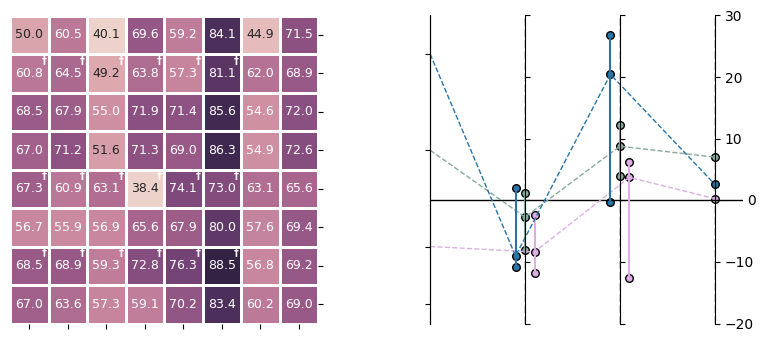

In [252]:
from copy import deepcopy


# left plot
def prepare_annot_for_heatmap(data):
    annot = np.array(data).copy()
    for i in range(annot.shape[0]):
        for j in range(annot.shape[1]):
            annot[i, j] = "{:.1f}".format(float(annot[i, j]))
    return annot


fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"width_ratios": [1, 0.8]})

heat = sns.heatmap(
    data_heatmap,
    cbar=False,
    cmap=sns.cubehelix_palette(as_cmap=True),
    annot=prepare_annot_for_heatmap(data_heatmap),
    ax=axes[0],
    yticklabels=False,
    xticklabels=False,
    fmt="",
    square=True,
    linewidths=0.8,
    annot_kws={"size": 9},
    vmin=40,
    vmax=90,
)

mask = np.zeros_like(data_heatmap, dtype=bool)
mask[:, -1] = True
mask[:, -2] = True
mask[0] = True
mask[2] = True
mask[3] = True
mask[5] = True
mask[7] = True

# Add asterisks to the specified cells
for i in range(data_heatmap.shape[0]):
    for j in range(data_heatmap.shape[1]):
        if not mask[i, j]:  # Check if the cell is marked for asterisk
            axes[0].text(
                j + 0.88,  # Adjust position slightly to the right of the cell
                i + 0.18,  # Center vertically
                "†",
                color="white",  # Asterisk color (contrast with heatmap)
                fontsize=7,
                ha="center",
                va="center",
                weight="bold",
            )

axes[0].tick_params(right=True, left=False, labelleft=False)
axes[0].set_yticks(np.arange(8) + 0.5)
axes[0].set_xticks(np.arange(8) + 0.5)
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# right plot
ax2 = axes[1].twinx()

right_ylim = [-20, 30]
left_ylim = [0, 8]
relative_y_ticks = [0.5, 2, 4.5, 7]
relative_familys = ["Intern", "Gemma", "Qwen", "LLaVA"]
delta_x = [0, 0.1, 0, -0.1]
relative_y_ticks_mapped = [
    x * (right_ylim[1] - right_ylim[0]) / (left_ylim[1] - left_ylim[0]) + left_ylim[0] for x in relative_y_ticks
]

axes[1].axvline(x=1, color="lightgray", ls="--")
axes[1].axvline(x=2, color="lightgray", ls="--")
axes[1].axvline(x=3, color="lightgray", ls="--")
ax2.axhline(y=0, color="black", ls="-", lw=1)


axes[1].spines["top"].set_visible(False)
axes[1].spines["bottom"].set_visible(False)
axes[1].spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["right"].set_visible(False)

middle_axes = [axes[1].twinx() for _ in range(3)]
for i, ax in enumerate(middle_axes):
    ax.set_ylim(right_ylim)

    # ax.get_yticklabels()[2].set_visible(False)

    # ax.yaxis.get_majorticklabels()[2].set_y(-100)

    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.spines["right"].set_position(("axes", (i + 1) / 3.3))

    if i < 2:
        # ax.set_yticks([])
        ax.set_yticklabels([])
    else:
        yticklabels = ax.get_yticklabels()
        yticklabels[2].set_visible(False)

    # x_p, y_p = yticklabels[2].get_position()
    # label = yticklabels[2].get_text()
    # ax.annotate(label, xy=(i + 0.2, y_p - 0.5), ha="right", va="top")

# plot
color_map = {"LLaVA": "#2874a6", "Gemma": "#ddaee4", "Qwen": "#86aaa0"}
for i, (family, value) in enumerate(zip(relative_familys, relative_y_ticks_mapped)):
    # skip Intern family
    if family == "Intern":
        continue

    color = color_map[family]
    start_y = value + right_ylim[0]
    rq1, rq2, rq3 = get_model_family_rq(df_rq, family)

    ax2.plot(
        [0, 1 + delta_x[i], 2 + delta_x[i], 3],
        [start_y, np.median(rq1), np.median(rq2), np.median(rq3)],
        ls="--",
        c=color,
        lw=1,
    )
    ax2.plot([1 + delta_x[i], 1 + delta_x[i]], [np.min(rq1), np.max(rq1)], c=color)
    ax2.plot([2 + delta_x[i], 2 + delta_x[i]], [np.min(rq2), np.max(rq2)], c=color)

    ax2.scatter(
        [1 + delta_x[i]] * len(rq1) + [2 + delta_x[i]] * len(rq2) + [3] * len(rq3),
        rq1 + rq2 + rq3,
        c=color,
        edgecolors="black",
        s=30,
    )


axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels([])


ax2.set_ylim(right_ylim)
ax2.set_ylabel("")
ax2.set_xlim([0, 3.3])

axes[1].set_xticks([])
axes[1].set_yticklabels([])
axes[1].set_yticks(relative_y_ticks_mapped)
axes[1].set_ylim([0, right_ylim[1] - right_ylim[0]])

ax2.set_yticks([])
# ax2.set_yticklabels([])
ax2.annotate("0", xy=(1.04, -0.1), xycoords=("axes fraction", "data"), ha="right", va="center")
# for yticklabel in yticklabels:
#     if yticklabel.get_text() != "0":
#         yticklabel.set_visible(False)
# ax2.set_yticks([])

plt.savefig(
    "heatmap/vqa.png",
    dpi=1000,
    bbox_inches="tight",
)

In [232]:
# # left plot
# def prepare_annot_for_heatmap(data):
#     annot = np.array(data).copy()
#     for i in range(annot.shape[0]):
#         for j in range(annot.shape[1]):
#             annot[i, j] = "{:.1f}".format(float(annot[i, j]))
#     return annot


# fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={
#                          "width_ratios": [1, 0.8]})

# heat = sns.heatmap(
#     data_heatmap,
#     cbar=False,
#     cmap=sns.cubehelix_palette(as_cmap=True),
#     annot=prepare_annot_for_heatmap(data_heatmap),
#     ax=axes[0],
#     yticklabels=False,
#     xticklabels=False,
#     fmt="",
#     square=True,
#     linewidths=0.8,
#     annot_kws={"size": 9},
#     vmin=40,
#     vmax=90,
# )

# mask = np.zeros_like(data_heatmap, dtype=bool)
# mask[:, -1] = True
# mask[:, -2] = True
# mask[0] = True
# mask[2] = True
# mask[3] = True
# mask[5] = True
# mask[7] = True

# # Add asterisks to the specified cells
# for i in range(data_heatmap.shape[0]):
#     for j in range(data_heatmap.shape[1]):
#         if not mask[i, j]:  # Check if the cell is marked for asterisk
#             axes[0].text(
#                 j + 0.88,  # Adjust position slightly to the right of the cell
#                 i + 0.18,  # Center vertically
#                 "†",
#                 color="white",  # Asterisk color (contrast with heatmap)
#                 fontsize=7,
#                 ha="center",
#                 va="center",
#                 weight="bold",
#             )

# axes[0].tick_params(right=True, left=False, labelleft=False)
# axes[0].set_yticks(np.arange(8) + 0.5)
# axes[0].set_xticks(np.arange(8) + 0.5)
# axes[0].set_xlabel("")
# axes[0].set_ylabel("")

# # right plot
# ax2 = axes[1].twinx()

# right_ylim = [-20, 30]
# left_ylim = [0, 8]
# relative_y_ticks = [0.5, 2, 4.5, 7]
# relative_familys = ["Intern", "Gemma", "Qwen", "LLaVA"]
# delta_x = [0, 0.1, 0, -0.1]
# relative_y_ticks_mapped = [
#     x * (right_ylim[1] - right_ylim[0]) / (left_ylim[1] - left_ylim[0]) + left_ylim[0] for x in relative_y_ticks
# ]

# axes[1].axvline(x=1, color="lightgray", ls="--")
# axes[1].axvline(x=2, color="lightgray", ls="--")
# axes[1].axvline(x=3, color="lightgray", ls="--")
# ax2.axhline(y=0, color="black", ls="-", lw=1)

# # plot
# color_map = {"LLaVA": "#2874a6", "Gemma": "#ddaee4", "Qwen": "#86aaa0"}
# for i, (family, value) in enumerate(zip(relative_familys, relative_y_ticks_mapped)):
#     # skip Intern family
#     if family == "Intern":
#         continue

#     color = color_map[family]
#     start_y = value + right_ylim[0]
#     rq1, rq2, rq3 = get_model_family_rq(df_rq, family)

#     ax2.plot([1 + delta_x[i], 1 + delta_x[i]],
#              [np.min(rq1), np.max(rq1)], c=color)
#     ax2.plot([2 + delta_x[i], 2 + delta_x[i]],
#              [np.min(rq2), np.max(rq2)], c=color)
#     ax2.plot(
#         [0, 1 + delta_x[i], 2 + delta_x[i], 3],
#         [start_y, np.median(rq1), np.median(rq2), np.median(rq3)],
#         ls="--",
#         c=color,
#     )

#     ax2.scatter(
#         [1 + delta_x[i]] * len(rq1) + [2 + delta_x[i]] *
#         len(rq2) + [3] * len(rq3),
#         rq1 + rq2 + rq3,
#         c=color,
#         edgecolors="black",
#         s=30,
#     )


# # df_rq = pd.DataFrame(RQ_data).dropna()
# # df_rq["RQ"] = pd.Categorical(df_rq["RQ"], ["RQ0", "RQ1", "RQ2", "RQ3"])

# axes[1].set_xticks([1, 2, 3])
# axes[1].set_xticklabels([])
# # axes[1].axhline(y=0, color="lightgray", ls="--")

# # sns.lineplot(
# #     data=df_rq,
# #     x="RQ",
# #     y="value",
# #     hue="model_family",
# #     sort=True,
# #     ax=ax2,
# #     hue_order=["LLaVA", "Qwen", "Gemma"],
# #     legend=False,
# # )
# # sns.stripplot(
# #     data=df_rq, x="RQ", y="value", hue="model_family", ax=ax2, hue_order=["LLaVA", "Qwen", "Gemma"], legend=False
# # )


# ax2.set_ylim(right_ylim)
# ax2.set_ylabel("")
# ax2.set_xlim([0, 3.3])


# axes[1].set_yticklabels([])
# axes[1].set_yticks(relative_y_ticks_mapped)
# axes[1].set_ylim([0, right_ylim[1] - right_ylim[0]])

# plt.savefig(
#     "heatmap/vqa.png",
#     dpi=1000,
#     bbox_inches="tight",
# )

In [233]:
model_order = [
    "LLaVA-1.5",
    "LLaVA-Med",
    "Qwen2-VL",
    "Qwen25-VL",
    "Lingshu",
    "Gemma3",
    "MedGemma",
    "VILA",
    "VILA-M3",
    "InternVL3",
]

data_order = [
    "VQA-RAD-ZS",
    "VQA-RAD-ML",
    "PathVQA-ZS",
    "PathVQA-ML",
    "SLAKE-ZS",
    "SLAKE-ML",
    "Harvard-FairVLMed10k-ZS",
    "Harvard-FairVLMed10k-ML",
]

data_heatmap = df_results.pivot(index="model", columns="dataset+tune_module", values="f1_overall")
data_heatmap = data_heatmap.reindex(model_order, axis=0)
data_heatmap = data_heatmap.reindex(data_order, axis=1)
data_heatmap

dataset+tune_module,VQA-RAD-ZS,VQA-RAD-ML,PathVQA-ZS,PathVQA-ML,SLAKE-ZS,SLAKE-ML,Harvard-FairVLMed10k-ZS,Harvard-FairVLMed10k-ML
model,,,,,,,,
LLaVA-1.5,0.323650,0.521257,0.286373,0.635573,0.273775,0.824140,0.352984,0.670534
LLaVA-Med,0.125846,0.564234,0.074496,0.563337,0.110219,0.782252,0.239254,0.645982
Qwen2-VL,0.447765,0.608376,0.355122,0.653005,0.318349,0.841718,0.410381,0.678358
Qwen25-VL,0.405327,0.630821,0.206231,0.648496,0.274167,0.848436,0.158831,0.667944
Lingshu,0.444689,0.506925,0.434498,0.354604,0.399380,0.665505,0.450496,0.580271
Gemma3,0.045758,0.480233,0.040720,0.580459,0.056352,0.773920,0.093368,0.660831
MedGemma,0.362130,0.595927,0.284133,0.662073,0.265892,0.871278,0.247693,0.665430
VILA,0.358242,0.472669,0.273644,0.537576,0.269113,0.637926,0.479477,0.647041
VILA-M3,0.770280,0.379170,0.630211,0.452742,0.889207,0.329168,0.356481,0.338911
